Run with /home/levinsj/Fetal_dir/Analysis/sif/pymetaneighbor_version2.sif environment

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pymn

In [2]:
#These save characters as text in PDFs
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#These change plot aesthetics

sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)

Plotting of DEGs being conserved

In [3]:
fetalDT = pd.read_csv("/home/levinsj/Fetal_dir/DEG/DCT_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')
fetalPT = pd.read_csv("/home/levinsj/Fetal_dir/DEG/PT_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')
fetalLOH = pd.read_csv("/home/levinsj/Fetal_dir/DEG/LOH_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')
fetalNPC = pd.read_csv("/home/levinsj/Fetal_dir/DEG/NPC_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')

fetalPodo = pd.read_csv("/home/levinsj/Fetal_dir/DEG/Podocyte_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')
fetalStroma = pd.read_csv("/home/levinsj/Fetal_dir/DEG/Stroma_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')
fetalEndothelial = pd.read_csv("/home/levinsj/Fetal_dir/DEG/Endothelium_fetal_time_dependent_genes.csv", index_col = 'Unnamed: 0')

fetalDT["names"] = fetalDT.index
fetalPT["names"] = fetalPT.index
fetalLOH["names"] = fetalLOH.index
fetalNPC["names"] = fetalNPC.index
fetalPodo["names"] = fetalPodo.index
fetalStroma["names"] = fetalStroma.index
fetalEndothelial["names"] = fetalEndothelial.index

fetalDT = fetalDT[fetalDT["padj"] < 0.05]
fetalPT = fetalPT[fetalPT["padj"] < 0.05]
fetalNPC = fetalNPC[fetalNPC["padj"] < 0.05]
fetalLOH = fetalLOH[fetalLOH["padj"] < 0.05]
fetalPodo = fetalPodo[fetalPodo["padj"] < 0.05]
fetalStroma = fetalStroma[fetalStroma["padj"] < 0.05]
fetalEndothelial = fetalEndothelial[fetalEndothelial["padj"] < 0.05]

### Genes associated with a younger gAge

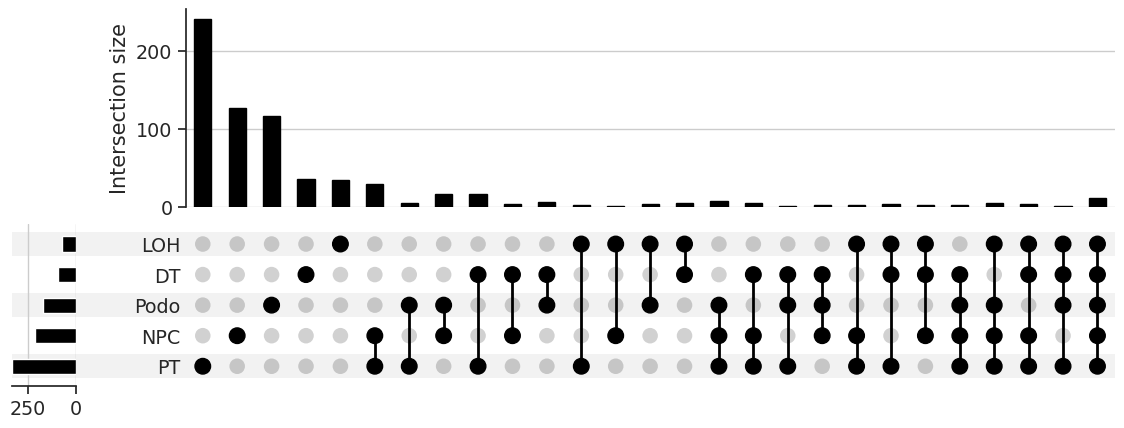

In [4]:
#subset to genes that are upregulated

fetalDT_markers = fetalDT["names"][fetalDT["log2FoldChange"] < 0]
fetalPT_markers = fetalPT["names"][fetalPT["log2FoldChange"] < 0]
fetalLOH_markers = fetalLOH["names"][fetalLOH["log2FoldChange"] < 0]
fetalPodo_markers = fetalPodo["names"][fetalPodo["log2FoldChange"] < 0]
fetalNPC_markers = fetalNPC["names"][fetalNPC["log2FoldChange"] < 0]

from upsetplot import from_contents
Fetal_Tubules = from_contents({'LOH': fetalLOH_markers, 'DT': fetalDT_markers, 'PT': fetalPT_markers, "Podo": fetalPodo_markers, "NPC": fetalNPC_markers})

from upsetplot import UpSet
ax_dict = UpSet(Fetal_Tubules, subset_size='count').plot()

Fetal_Tubules.to_csv('/home/levinsj/Fetal_dir/DEG/upset/younger_gAGE_upset_nephronOnly.csv', index=True)

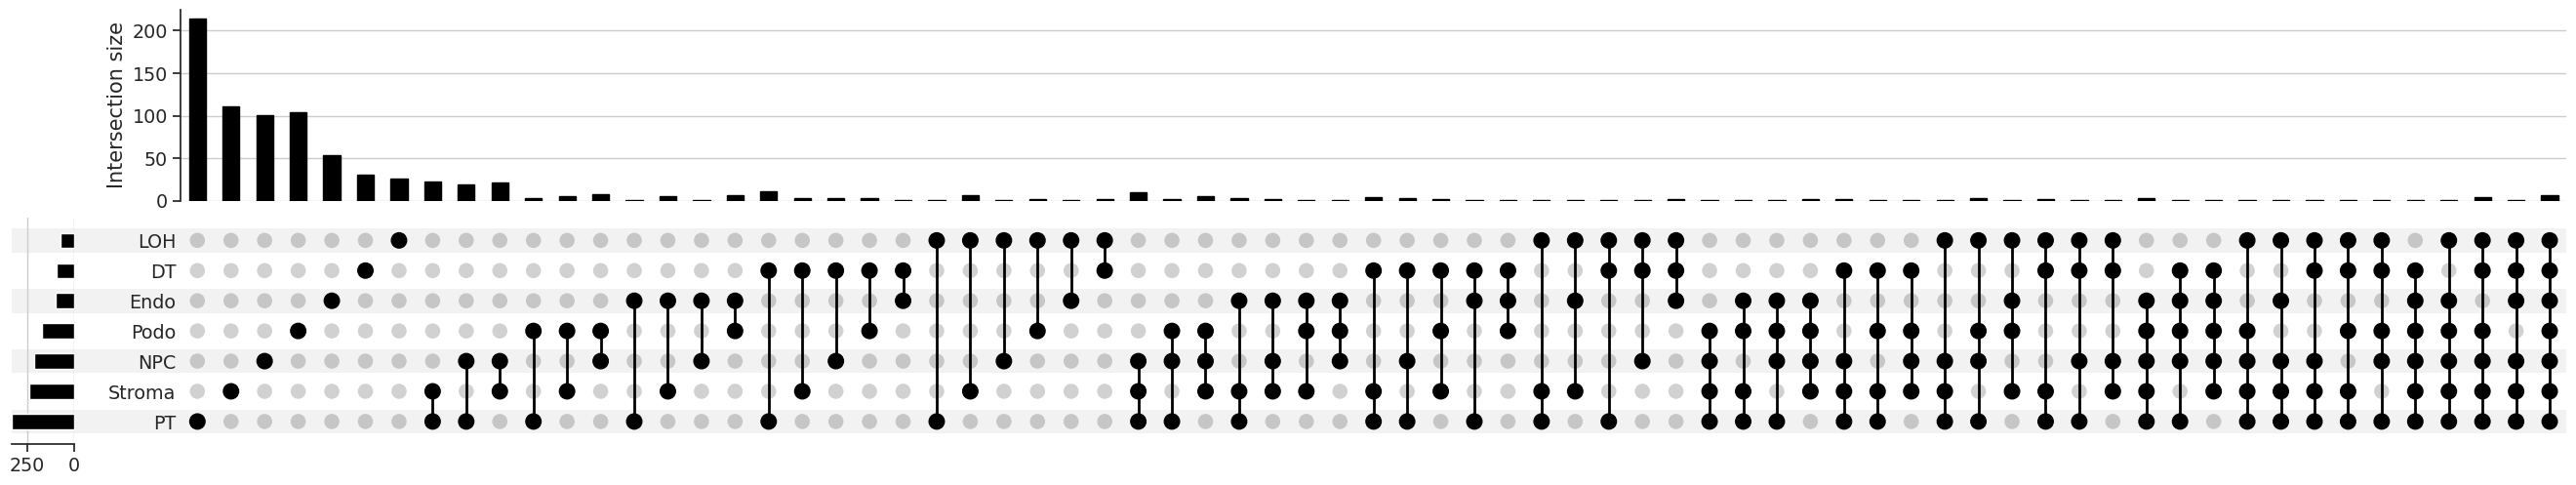

In [5]:
#subset to genes that are upregulated

fetalDT_markers = fetalDT["names"][fetalDT["log2FoldChange"] < 0]
fetalPT_markers = fetalPT["names"][fetalPT["log2FoldChange"] < 0]
fetalLOH_markers = fetalLOH["names"][fetalLOH["log2FoldChange"] < 0]
fetalPodo_markers = fetalPodo["names"][fetalPodo["log2FoldChange"] < 0]
fetalNPC_markers = fetalNPC["names"][fetalNPC["log2FoldChange"] < 0]

fetalStroma_markers = fetalStroma["names"][fetalStroma["log2FoldChange"] < 0]
fetalEndothelial_markers = fetalEndothelial["names"][fetalEndothelial["log2FoldChange"] < 0]

from upsetplot import from_contents
Fetal_Tubules = from_contents({'LOH': fetalLOH_markers, 'DT': fetalDT_markers, 'PT': fetalPT_markers, "Podo": fetalPodo_markers,"NPC":fetalNPC_markers, "Stroma": fetalStroma_markers, "Endo": fetalEndothelial_markers})

from upsetplot import UpSet
ax_dict = UpSet(Fetal_Tubules, subset_size='count').plot()

Fetal_Tubules.to_csv('/home/levinsj/Fetal_dir/DEG/upset/younger_gAGE_upset_all.csv', index=True)

### genes associated with an older gAge

                                    id
LOH   DT    PT    Podo  NPC           
True  False False True  False     PTMA
                  False False   MT-ND4
                        False   CASC15
      True  True  False False  NDUFA13
      False False False False    ERCC6
...                                ...
False False False False True    PDLIM5
                        True    KIRREL
                        True    CSNK1E
                        True    ZNF791
                        True     KCNC2

[910 rows x 1 columns]


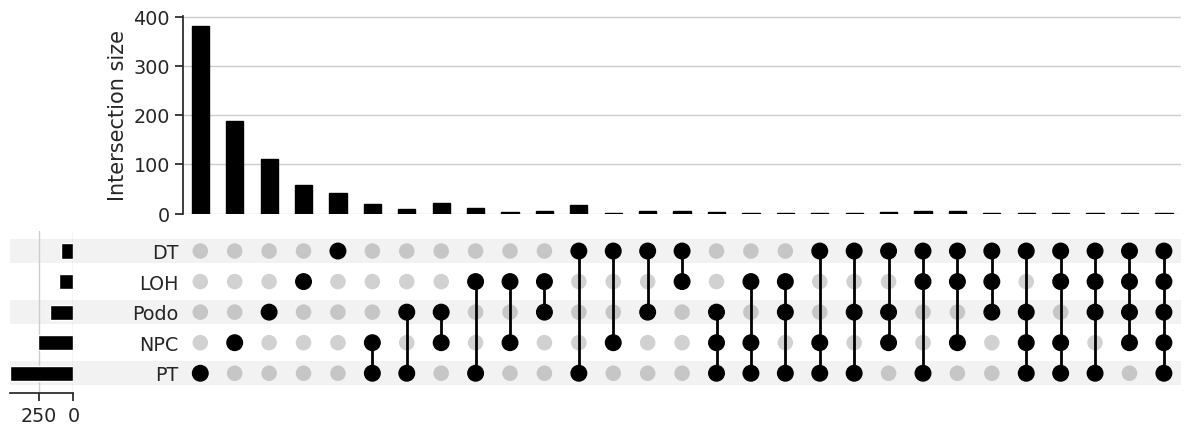

In [6]:
#subset to genes that are upregulated

adultDT_markers = fetalDT["names"][fetalDT["log2FoldChange"] > 0]
adultPT_markers = fetalPT["names"][fetalPT["log2FoldChange"] > 0]
adultLOH_markers = fetalLOH["names"][fetalLOH["log2FoldChange"] > 0]
adultPodo_markers = fetalPodo["names"][fetalPodo["log2FoldChange"] > 0]
adultNPC_markers = fetalNPC["names"][fetalNPC["log2FoldChange"] > 0]


from upsetplot import from_contents
AdultTubules = from_contents({'LOH': adultLOH_markers, 'DT': adultDT_markers, 'PT': adultPT_markers, "Podo": adultPodo_markers, "NPC": adultNPC_markers})

from upsetplot import UpSet
ax_dict = UpSet(AdultTubules, subset_size='count').plot()

print(AdultTubules)
AdultTubules.to_csv('/home/levinsj/Fetal_dir/DEG/upset/older_gAGE_upset_nephronOnly.csv', index=True)

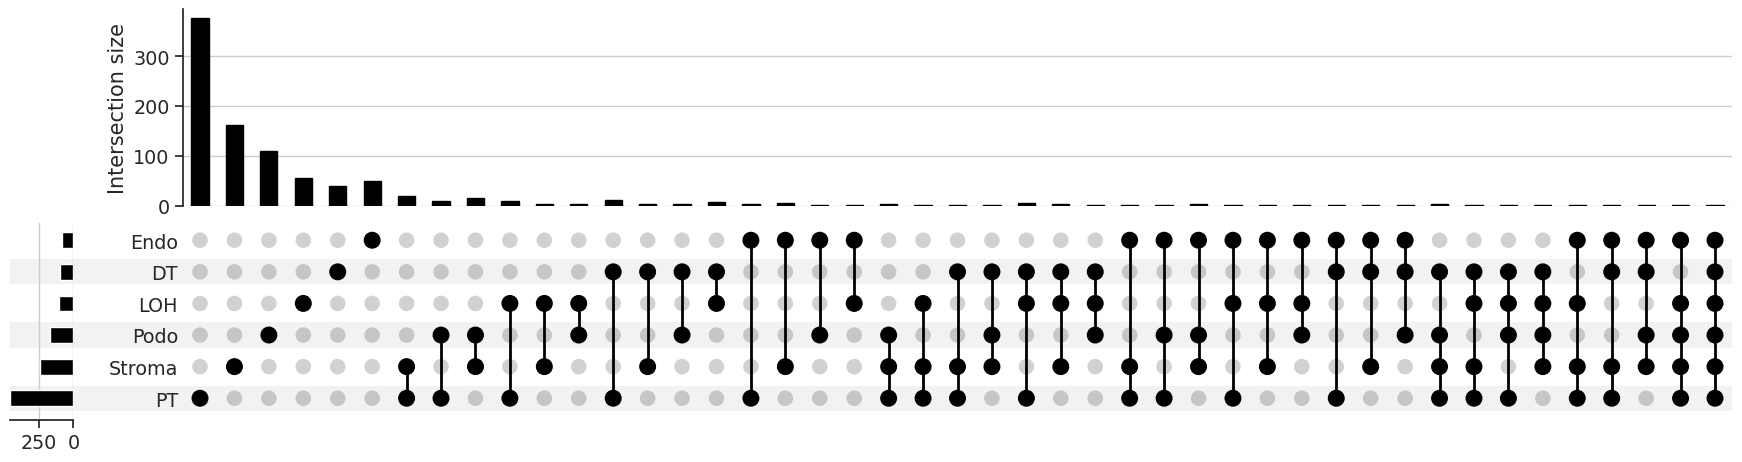

In [7]:
#subset to genes that are upregulated

adultDT_markers = fetalDT["names"][fetalDT["log2FoldChange"] > 0]
adultPT_markers = fetalPT["names"][fetalPT["log2FoldChange"] > 0]
adultLOH_markers = fetalLOH["names"][fetalLOH["log2FoldChange"] > 0]
adultPodo_markers = fetalPodo["names"][fetalPodo["log2FoldChange"] > 0]

adultStroma_markers = fetalStroma["names"][fetalStroma["log2FoldChange"] > 0]
adultEndothelial_markers = fetalEndothelial["names"][fetalEndothelial["log2FoldChange"] > 0]


from upsetplot import from_contents
AdultTubules = from_contents({'LOH': adultLOH_markers, 'DT': adultDT_markers, 'PT': adultPT_markers, "Podo": adultPodo_markers, "Stroma": adultStroma_markers, "Endo" : adultEndothelial_markers})

from upsetplot import UpSet
ax_dict = UpSet(AdultTubules, subset_size='count').plot()

AdultTubules.to_csv('/home/levinsj/Fetal_dir/DEG/upset/older_gAGE_upset_all.csv', index=True)